<a name = "inicio"></a>

<div style="font-size: 50px;text-align: center;height:60px;padding:10px;margin:10px 0 0 0;">Análisis de Series Temporales</div>
<div style="font-size: 40px;text-align: center;height:50px;padding:10px;margin:0 0 10px 0;">con modelos ARIMA</div>

1. [Introducción](#Introducción)
1. [Carga y transformación de datos](#Carga-y-transformación-de-datos)
1. [El modelo Autorregresivo (AR)](#El-modelo-Autorregresivo-(AR))
    1. [Implicaciones matemáticas](#Implicaciones-matemáticas)
        1. [Correlación](#Correlación)
        1. [Autocorrelación](#Autocorrelación)
        1. [La función de autocorrelación (ACF)](#La-función-de-autocorrelación-(ACF))
        1. [La función de autocorrelación parcial (PACF)](#La-función-de-autocorrelación-parcial-(PACF))
        1. [Ruido blanco](#Ruido-blanco)
    1. [Modelado de AR](#Modelado-de-AR)
    1. [AIC y BIC](#AIC-y-BIC)
    1. [Predicción](#Predicción)
1. [El modelo Moving Average (MA)](#El-modelo-Moving-Average-(MA))
1. [El modelo ARMA](#El-modelo-ARMA)
1. [Series estacionarias (stationary series)](#Series-estacionarias-(stationary-series))
    1. [El test de Dicky-Fuller Aumentado](#El-test-de-Dicky-Fuller-Aumentado)
    1. [Transformaciones](#Transformaciones)
    1. [Integración](#Integración)
1. [El modelo ARIMA](#El-modelo-ARIMA)
1. [Búsqueda en bucle del mejor modelo](#Búsqueda-en-bucle-del-mejor-modelo)
1. [Descomposición de una serie estacional](#Descomposición-de-una-serie-estacional)
1. [El modelo SARIMA](#El-modelo-SARIMA)
1. [Diagnóstico del modelo](#Diagnóstico-del-modelo)
1. [Automatización del cálculo de los órdenes óptimos](#Automatización-del-cálculo-de-los-órdenes-óptimos)
1. [El modelo ARIMAX](#El-modelo-ARIMAX)
1. [Miscelánea](#Miscelánea)
    1. [Perfiles de los datos AR y MA](#Perfiles-de-los-datos-AR-y-MA)
        1. [Datos AR](#Datos-AR)
        1. [Datos MA](#Datos-MA)
    1. [Tipos de datos temporales en pandas](#Tipos-de-datos-temporales-en-pandas)
    1. [Herramientas de pandas](#Herramientas-de-pandas)
        1. [Remuestreado](#Remuestreado)
        1. [Interpolado](#Interpolado)
        1. [Truncado](#Truncado)
        1. [Desplazamientos](#Desplazamientos)
        1. [Diferencias](#Diferencias)

# Introducción
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

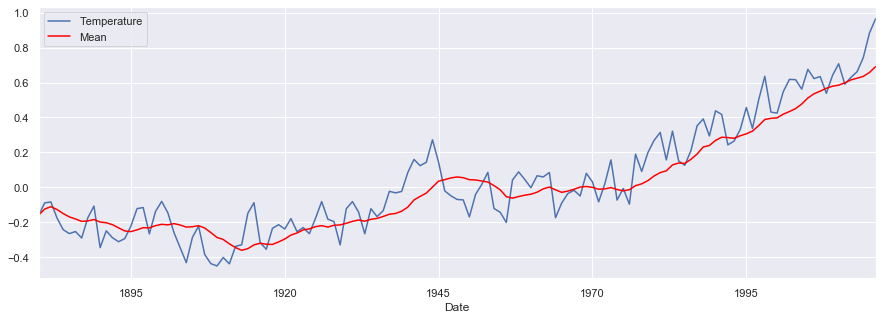

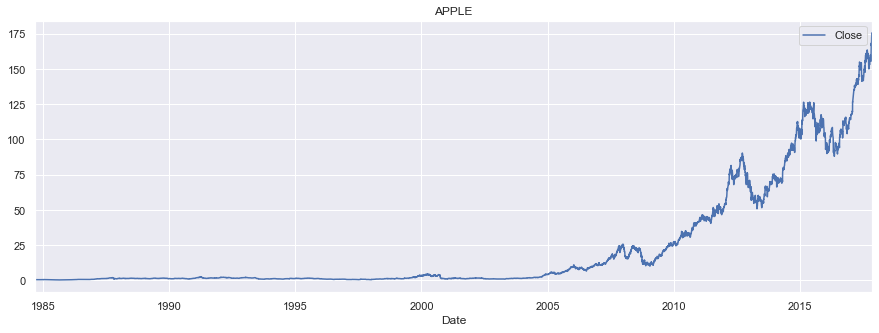

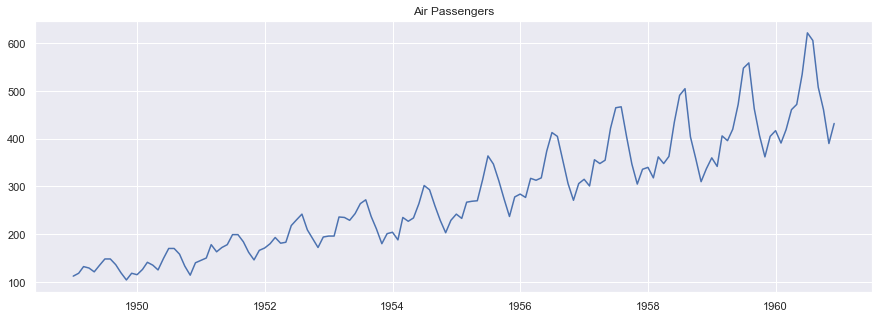

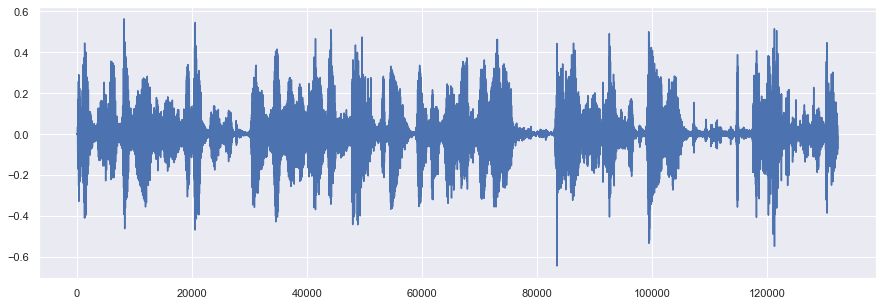

# Carga y transformación de datos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Comencemos cargando un conjunto de datos con información temporal: el dataset <i>candy</i> con información sobre la producción de caramelos en los Estados Unidos.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import os
os.getcwd()

'/Users/victormac/PROYECTOS/REPOS/REPOS-Github/master-data-science/10_Seriestemporales_s11'

In [9]:
candy = pd.read_csv("datasets/candy_production.csv")
candy.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [13]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
observation_date    548 non-null object
IPG3113N            548 non-null float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


In [107]:
#Convertir el observationdate en un datetime
candy = pd.read_csv("datasets/candy_production.csv", parse_dates = ["observation_date"])
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
observation_date    548 non-null datetime64[ns]
IPG3113N            548 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


In [108]:
# Cambiar los nombres de los encabezados, importante poner lo del axis 1, el inplace lo aplica sobre el pandas
candy = pd.read_csv("datasets/candy_production.csv", parse_dates = ["observation_date"])
candy.rename({"observation_date": "date", "IPG3113N": "production"}, inplace = True, axis = 1)
# Llevar al índice la fecha
candy.set_index("date", inplace = True)
candy.head()

,production
date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


In [109]:
# Importante convertir el datetime en periodo porque está así en los datos
candy = candy.to_period("M")
candy.head()

,production
date,
1972-01,85.6945
1972-02,71.8200
1972-03,66.0229
1972-04,64.5645
1972-05,65.0100


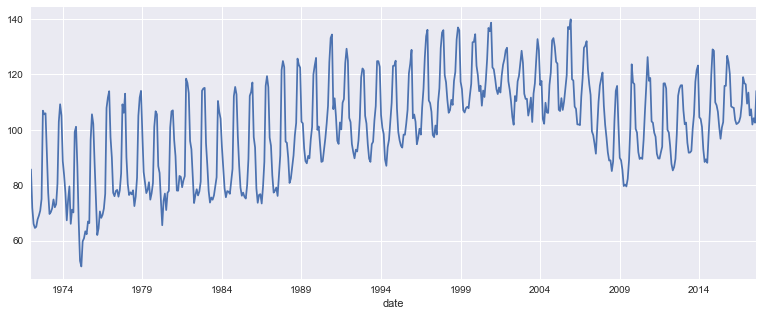

In [113]:
#Verlo en un plot
plt.style.use("seaborn")
plt.subplots(figsize = (13,5))
candy.production.plot()
plt.show()

In [114]:
#Fijamos este tamaño y especificaciones por defecto
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = 13, 5

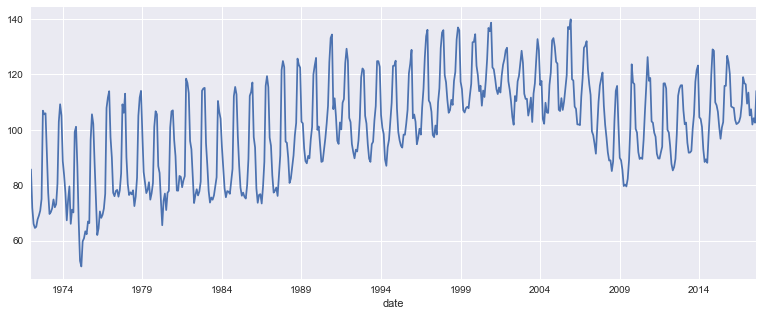

In [115]:
# Mismo que lo aterior pero más corto
candy.production.plot();

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Carga y muestra en pantalla los datos relativos al valor bursátil de IBM (dataset "ibm.txt"). Quédate apenas con el campo "Close" (además del campo que contiene la fecha, por supuesto).</div>
</div>

In [34]:
ibm = pd.read_csv("datasets/ibm.txt", parse_dates = ["Date"], usecols = ["Date", "Close"], index_col = "Date")
ibm.head()

,Close
Date,
1962-01-02,6.3378
1962-01-03,6.3963
1962-01-04,6.3295
1962-01-05,6.2041
1962-01-08,6.0870


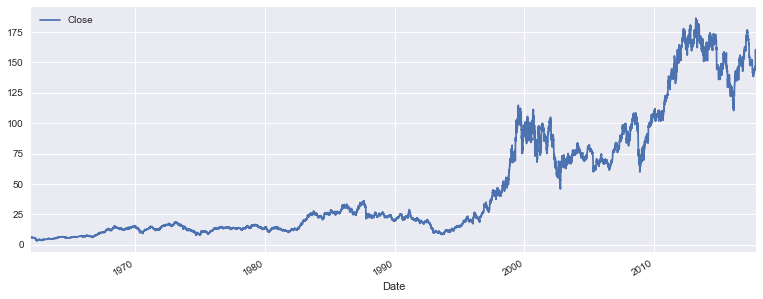

In [35]:
ibm.plot()

# El modelo Autorregresivo (AR)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<strong>R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + ... + a<sub>p</sub>.R<sub>t-p</sub> + &epsilon;<sub>t</sub></strong>

p: orden del modelo

AR(1): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + &epsilon;<sub>t</sub>

AR(2): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + &epsilon;<sub>t</sub>

AR(p): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + ... + a<sub>p</sub>.R<sub>t-p</sub> + &epsilon;<sub>t</sub>

![image.png](attachment:image.png)

## Implicaciones matemáticas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Correlación
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Alta correlación (positiva):

In [37]:
r = pd.Series([3.4, 8.9, 6.8, 0.6, 4.6, 8.4, 7.8, 1.3, 5.0 , 0.7])
s = pd.Series([6.4, 9.8, 8.8, 4.8, 6.9, 9.4, 7.8, 3.7, 7.7, 6.0 ])

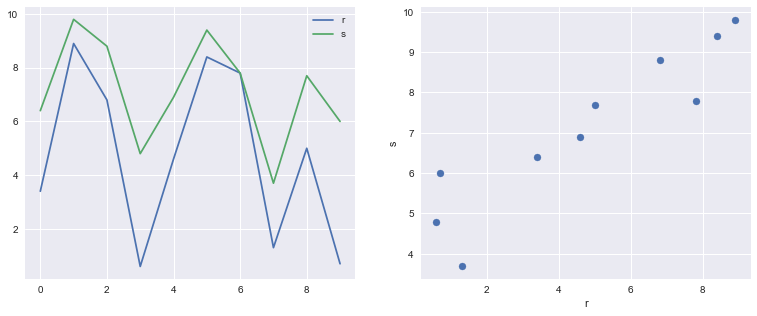

0.9215849991769304


In [43]:
fig, ax = plt.subplots(1,2)
ax[0].plot(r, label = "r")
ax[0].plot(s, label = "s")
ax[0].legend()

ax[1].scatter(r, s)
ax[1].set_xlabel("r")
ax[1].set_ylabel("s")

plt.show()
print(r.corr(s))
# Hay una alta correlación

Alta correlación (negativa):

In [44]:
r = pd.Series([7.5, 8.8, 8.2, 4.5, 5.5, 6.4, 9.8, 6.2, 4.5, 8.7])
s = pd.Series([4.4, 5.6, 6.1, 9.9, 8.3, 8.3, 2.2, 8.4, 7.4, 4.3])

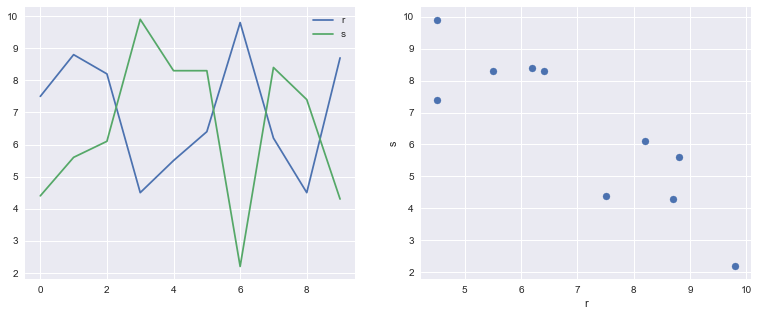

-0.8725229717753339


In [45]:
fig, ax = plt.subplots(1,2)
ax[0].plot(r, label = "r")
ax[0].plot(s, label = "s")
ax[0].legend()

ax[1].scatter(r, s)
ax[1].set_xlabel("r")
ax[1].set_ylabel("s")

plt.show()
print(r.corr(s))
# Hay una correlación negativa

Baja correlación:

In [47]:
r = pd.Series([8.4, 5.3, 3.2, 9. , 1.2, 4.1, 7.3, 7.2, 2.8, 3.7])
s = pd.Series([6.3, 9. , 4.3, 5.5, 6.8, 9.6, 4.4, 1.6, 5.6, 0.5])

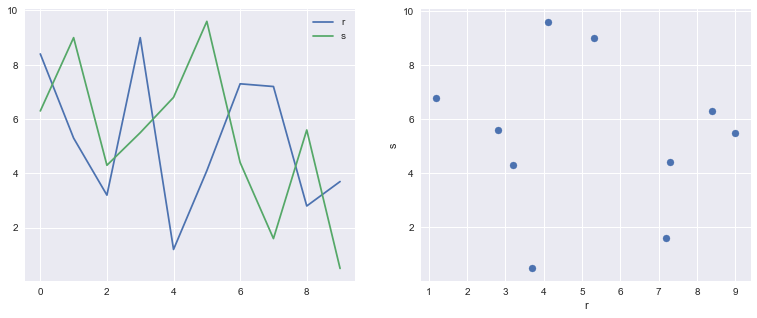

-0.10630510433176735


In [48]:
fig, ax = plt.subplots(1,2)
ax[0].plot(r, label = "r")
ax[0].plot(s, label = "s")
ax[0].legend()

ax[1].scatter(r, s)
ax[1].set_xlabel("r")
ax[1].set_ylabel("s")

plt.show()
print(r.corr(s))
# No hay correlación

http://tylervigen.com/view_correlation?id=1703

Ojo, correlación no implica causalidad!!! la gráfica muestra una correlación arbitraria

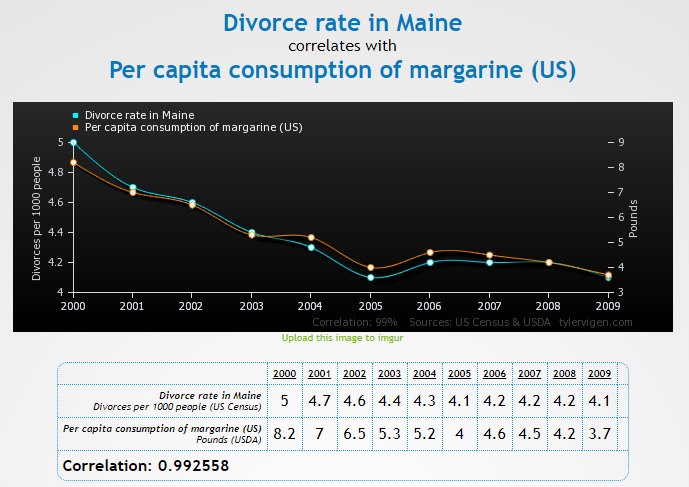

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra en una gráfica la evolución de los valores bursátiles de IBM y Apple, y calcula la correlación entre ellos. Quédate solo con la columna "Close" (además de la que contiene la etiqueta temporal).</div>
</div>

In [55]:
ibm = pd.read_csv("datasets/ibm.txt", parse_dates = ["Date"], usecols = ["Date", "Close"], index_col = "Date")
apple = pd.read_csv("datasets/aapl.txt", parse_dates = ["Date"], usecols = ["Date", "Close"], index_col = "Date")
apple.head()

,Close
Date,
1984-09-07,0.42388
1984-09-10,0.42134
1984-09-11,0.42902
1984-09-12,0.41618
1984-09-13,0.43927


In [56]:
#Vemos la correlación, es alta
ibm.Close.corr(apple.Close)

0.796333012740717

### Autocorrelación
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [60]:
s = pd.Series(np.random.randint(0, 5, (10)))
s

0    4
1    1
2    4
3    1
4    0
5    3
6    1
7    4
8    0
9    2
dtype: int64

1.0

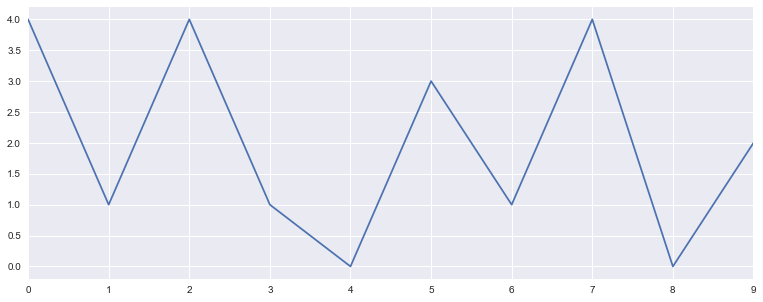

In [64]:
s.plot();
s.corr(s)


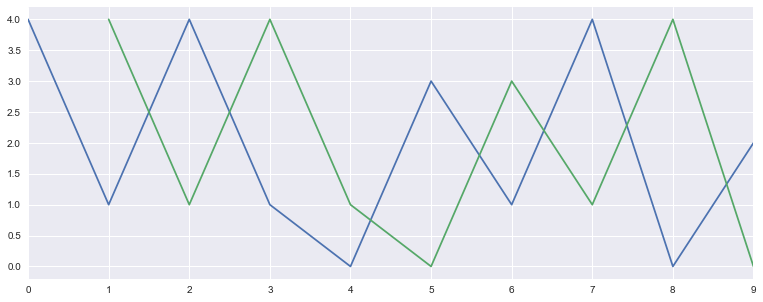

-0.600071018524247

In [68]:
#Autcorrelación para un lag 1
s.plot()
s.shift(1).plot()
plt.show()
s.corr(s.shift(1)) # Correlación media

##### ¿Qué tipo de series mostrarán autocorrelación alta para algún lag?

Las perfectamente periódicas son las que tendrán autocorrelación alta para algún lag

In [69]:
x = np.linspace(0, 12, 24)
y = np.sin(x)
y = pd.Series(y)

1.0


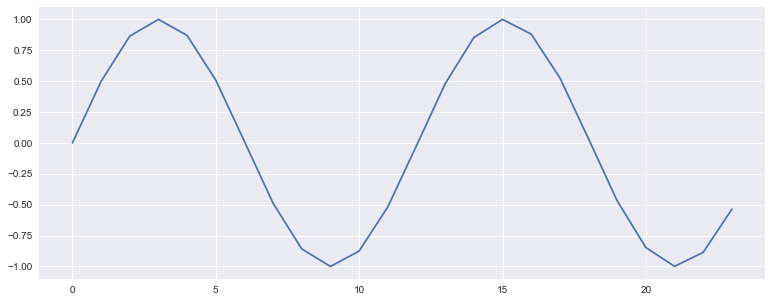

In [70]:
plt.plot(y);
print(y.corr(y))
# 

0.5582079972438304


<function matplotlib.pyplot.show(*args, **kw)>

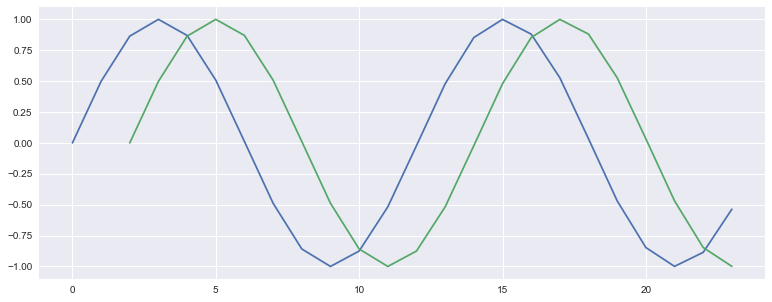

In [75]:
lag = 2 # Según aumentas el lag aumenta la correlación, entonces:
# las series periódicas van a tener una correlación elevada.
plt.plot(y)
plt.plot(y.shift(lag))
print(y.corr(y.shift(lag)))
plt.show

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Calcula la autocorrelación de la función senoidal y para los lags entre 0 y 19</div>
</div>

In [76]:
for lag in range (20):
    print(lag, y.corr(y.shift(lag)))
# Esta sería la función de autocorrelación y la librearía statmodels ya nos la da

0 1.0
1 0.8769662829481311
2 0.5582079972438304
3 0.10295090073607359
4 -0.4156445200785021
5 -0.8400800103410611
6 -0.999932907269958
7 -0.8754213232665885
8 -0.5554622541938354
9 -0.10504434514224269
10 0.412874630842383
11 0.8394041433021404
12 0.9997525833198961
13 0.8968791741912434
14 0.6497962146967481
15 0.3265721747933026
16 -0.09108626980054131
17 -0.631830220760804
18 -0.9982702377583391
19 -0.5889255730259966


### La función de autocorrelación (ACF)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Tanto en acf como en plot_acf deberemos usar el parámetro unbiased = True para evitar que influya el número limitado de muestras.

In [84]:
from statsmodels.tsa.stattools import acf

In [85]:
acf_values = acf(y)

In [86]:
acf_values

array([ 1.00000000e+00,  8.65914102e-01,  5.22049258e-01,  7.50490284e-02,
       -3.50519749e-01, -6.46809616e-01, -7.49954813e-01, -6.53080811e-01,
       -4.02659619e-01, -8.06372700e-02,  2.21445501e-01,  4.28368992e-01,
        4.99876288e-01,  4.37446120e-01,  2.78442804e-01,  8.06518916e-02,
       -9.72141793e-02, -2.12757341e-01, -2.49863670e-01, -2.19097923e-01,
       -1.49453811e-01, -7.51023663e-02, -2.21377966e-02,  4.49806965e-05])

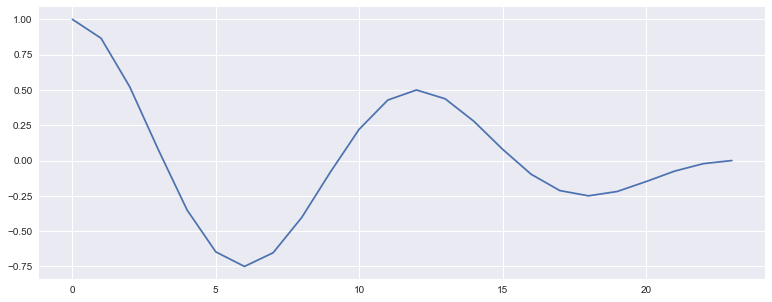

In [87]:
plt.plot(acf_values);
# Se ve raro porque el método de cálculo de statmodels hace algo que impacta el resultado,
# para solucionar esto se hace el unbiased (ver después)

/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


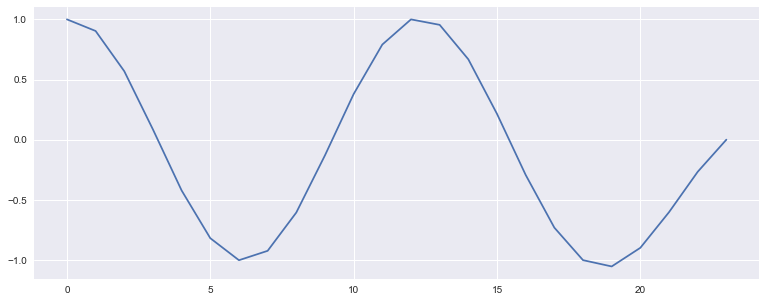

In [88]:
acf_values = acf(y, unbiased = True)
plt.plot(acf_values);

In [95]:
# La función QUE HACE TODO AUTOMÁTICAMENTE para evitar lo anterior
from statsmodels.graphics.tsaplots import plot_acf

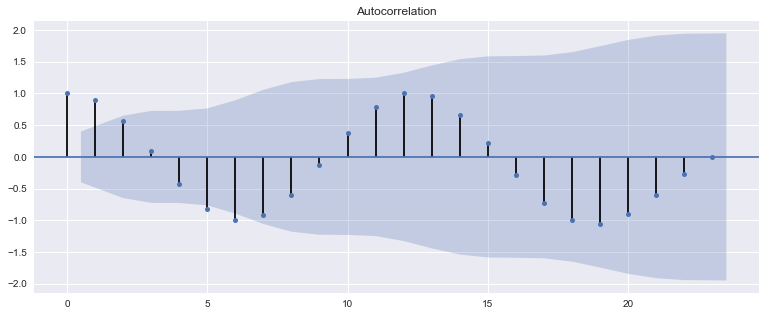

In [103]:
plot_acf(y, unbiased = True, lags = 23);

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra en pantalla la función de autocorrelación de candy para los 50 primeros lags. Interpreta el resultado</div>
</div>

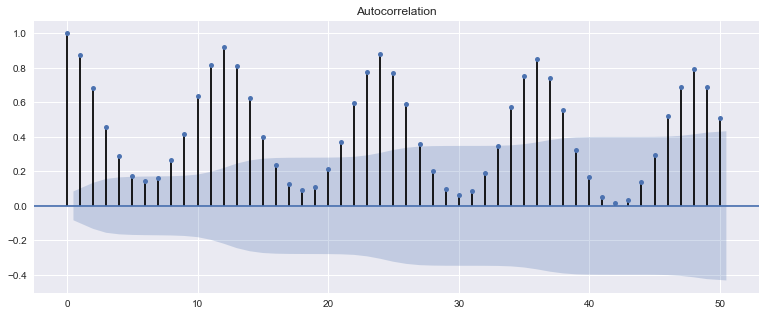

In [116]:
plot_acf(candy.production, lags = 50, unbiased= True);
# Se ve que cada 12 periodos hay algo semejante, podemos intuir que la perioricidad de la serie es de 12 meses.

### La función de autocorrelación parcial (PACF)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

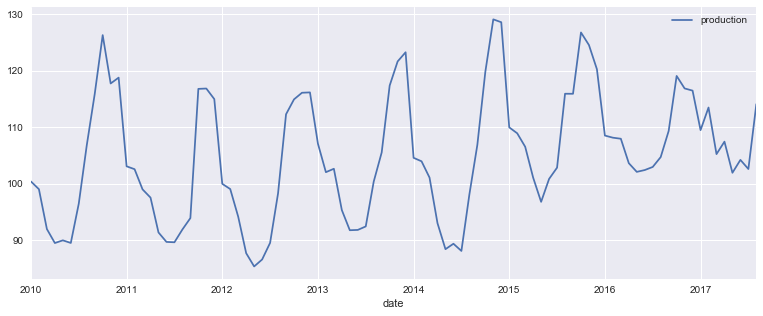

In [118]:
candy.truncate(before = "2010").plot();

In [119]:
# Esto es IMPORTANTE
# Vamos a suponer que la venta de caramelos en navidad es alta...
# ¿Hace falta conocer el incremento de un mes a otro de diferentes periodos antiguos para hacer una mejor predicción de futuro?
# Respuesta: Si la periodicidad es perfecta no hace falta, si es diferente sí puede ser que haga falta.
# Pero que nos interesa es saber la influencia de un periodo, y para otros periodos saber la
# influencia adicional, no toda, porque suponemos que es muy parecida (tiene alta correlación) 
# Esto es lo que calcula la función de autocorrelación parcial

Para evitar errores, podemos vernos obligados a especificar el método de cálculo: method = "ywm"

In [121]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

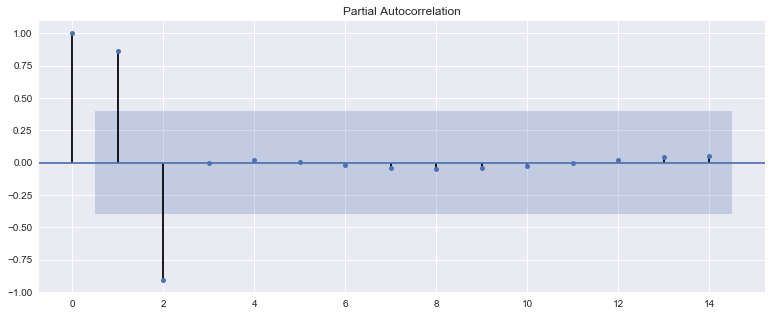

In [123]:
plot_pacf(y, method =  "ywm");
# 
# Esto nos dice que el valor actual (0- Si desplazo un lag a la derecha, 1) la dependencia del valor anterior es muy elevada
# pero para (2 - Si desplazo dos lag a la derech) es muy baja

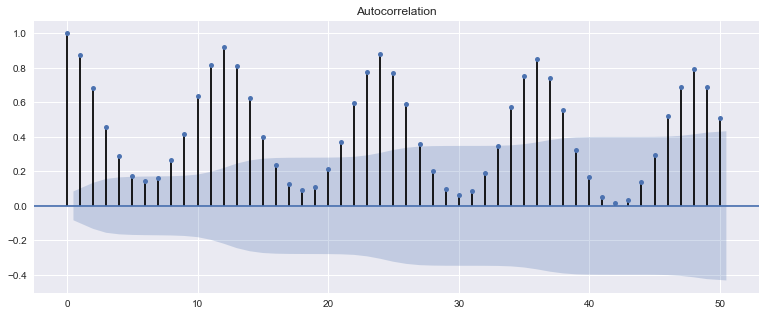

In [124]:
# Del ejemplo anterior, no solo queremos saber la periodicidad,
# lo que queremos saber es la influencia de cada periodo(todos) al actual.
plot_acf(candy.production, lags = 50, unbiased= True);

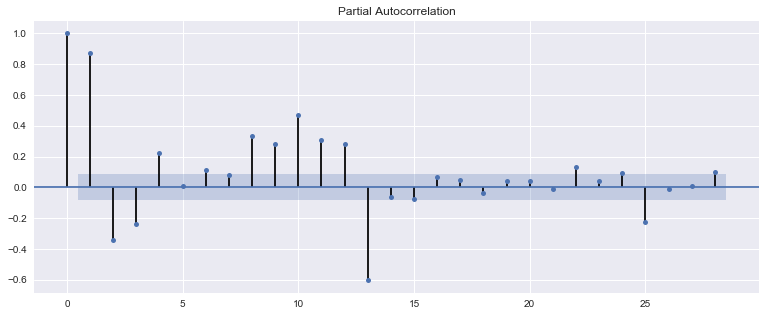

In [125]:
# Autocorrelación parcial
plot_pacf(candy, method =  "ywm");
# Así vemos más información útil, como que en el mes 2 es positiva y el mes 3 es negativa
# ¿por qué? Eso es lo que nos interesa saber
# Una cosa curiosa

### Ruido blanco
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

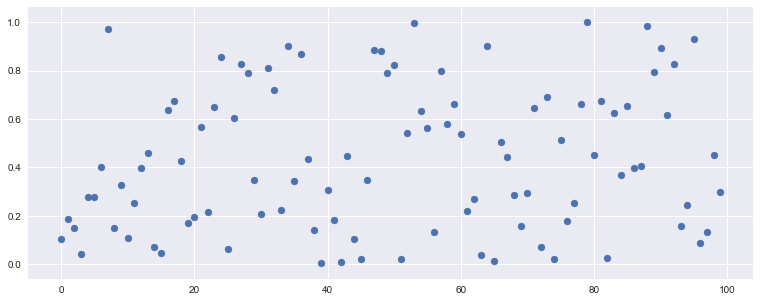

In [129]:
a = np.random.rand(100)
plt.scatter(range(100), a)
# Esto es ruido blanco: Autocorrelación es nula, varianza constante y la media es cero

## Modelado de AR
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Candy - AR(2):

In [130]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [131]:
model = SARIMAX(candy, order = (2, 0, 0)).fit()
# La serie, el order (R2, cada valor es calculable cogiendo los dos anteriores), y luego fit para entrenar
# Si cogemos R = 20, se nos puede volver un modelo más complicado de explicarle y podemos caer en sobreentrenamiento

In [132]:
model.summary()
#un resumen del modelo
# AIC, se evalua cómo de bueno es el algoritmo: cuanto menos este número, mejor. De 0 sería perfecto, mayor, peor
# BIC, 
# ar.L1, el 1.2 = depende mucho del mes anterior
# ar.L2, el -0.2 = hay una correlación negativa es baja, si este dato fuera muy alto, podemos hacer un R3


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  548
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1965.427
Date:                Fri, 13 Mar 2020   AIC                           3936.854
Time:                        19:45:45   BIC                           3949.773
Sample:                    01-31-1972   HQIC                          3941.904
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2575      0.056     22.553      0.000       1.148       1.367
ar.L2         -0.2624      0.057     -4.638      0.000      -0.373      -0.152
sigma2        75.6479      3.187     23.739      0.000      69.402      81.894
===================================================================================
Ljung-Box (Q):                     1697.19   Jarque-Bera (JB):               125.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## AIC y BIC
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [136]:
# Se pueden extraer así
model.aic

3936.8543798817723

In [137]:
model.bic

3949.7732057426165

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Compara los valores de AIC y BIC para los modelos AR de orden 1 y 2 aplicados a candy.</div>
</div>

In [140]:
model1p = SARIMAX(candy, order = (1, 0, 0)).fit()
model2p = SARIMAX(candy, order = (2, 0, 0)).fit()
print(model1p.aic, model1p.bic)
print(model2p.aic, model2p.bic)
# El mejor modelo es el 2, porque el AIC y BIC son menores.

3973.679772254489 3982.292322828385
3936.8543798817723 3949.7732057426165


## Predicción
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [142]:
#Vamso a hacer el modelo, step = para cuantos valores queremos que realice la predicción
prediction = model.get_forecast(steps = 12)

In [143]:
# Predicción del valor medio para cada mes
prediction.predicted_mean

2017-09    116.518645
2017-10    116.597866
2017-11    116.052706
2017-12    115.346361
2018-01    114.601152
2018-02    113.849361
2018-03    113.099493
2018-04    112.353769
2018-05    111.612753
2018-06    110.876568
2018-07    110.145224
2018-08    109.418700
Freq: M, dtype: float64

In [144]:
#Para las anteriores prediccionesm cuál es la probabilidad
# Con una probabilidad del 99%, puedo decir que será de xxxxx
prediction.conf_int()

,lower production,upper production
2017-09,99.471696,133.565593
2017-10,89.208997,143.986735
2017-11,80.616458,151.488954
2017-12,73.289381,157.403342
2018-01,66.863888,162.338415
2018-02,61.093505,166.605218
2018-03,55.818245,170.380742
2018-04,50.932089,173.775449
2018-05,46.362008,176.863497
2018-06,42.055615,179.697520


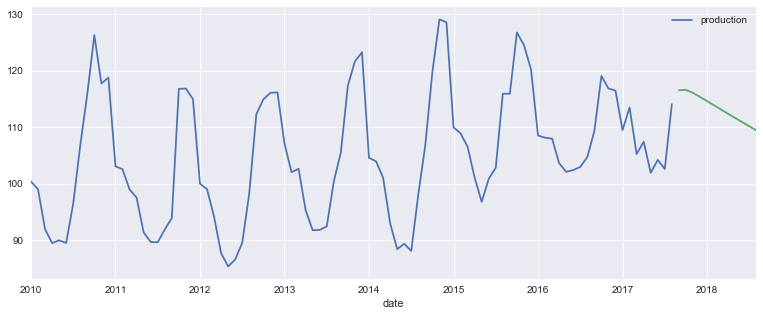

In [146]:
# Para ver la gráfica y su predicción media sobre la gráfica (y se ve que continua...)
candy.truncate(before ='2010').plot()
prediction.predicted_mean.plot()
plt.show()

In [148]:
lower = prediction.conf_int()['lower production']
upper = prediction.conf_int()['upper production']

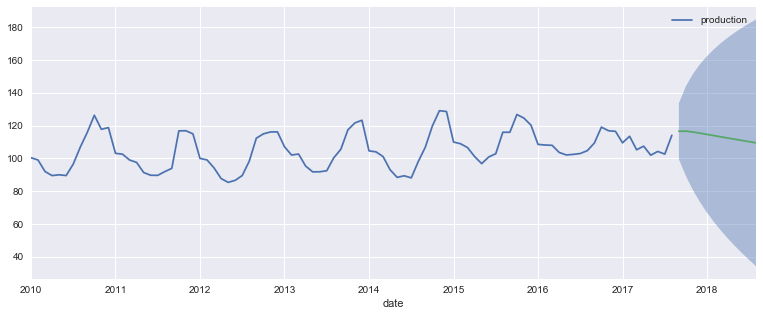

In [150]:
candy.truncate(before ='2010').plot()
prediction.predicted_mean.plot()
plt.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()
# No se ve nada claro pero es así, pero sigamos con lo siguiente


In [151]:
# lo que tenemos es la predicción del modelo para todos los datos de candy,
# haciendo la comparación con los periodos conocidos
model.fittedvalues

date
1972-01      0.000000
1972-02     85.365009
1972-03     67.830866
1972-04     64.181334
1972-05     63.868445
              ...    
2017-04    102.551244
2017-05    107.485745
2017-06     99.980975
2017-07    104.295011
2017-08    101.664116
Freq: M, Length: 548, dtype: float64

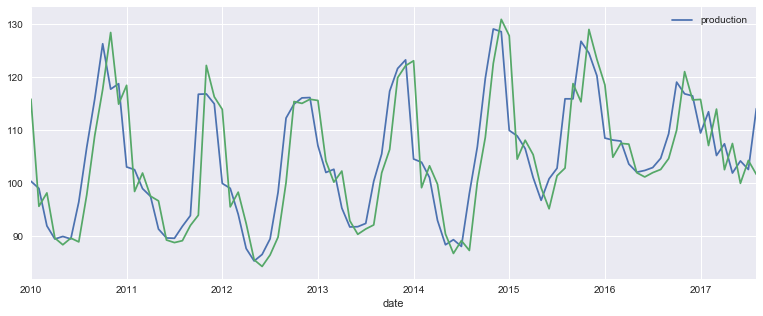

In [153]:
candy.truncate(before ='2010').plot()
model.fittedvalues.truncate(before ='2010').plot()
plt.show()

In [154]:
from sklearn.metrics import mean_squared_error

In [155]:
mean_squared_error(candy.production, model.fittedvalues)

88.97417983752257

# El modelo Moving Average (MA)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<strong>R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&epsilon;<sub>t-2</sub> + ... + m<sub>q</sub>.&epsilon;<sub>t-q</sub> + &epsilon;<sub>t</sub></strong>

q: orden del modelo

MA(1): R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

MA(2): R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&epsilon;<sub>t-2</sub> + &epsilon;<sub>t</sub>

MA(q): R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&epsilon;<sub>t-2</sub> + ... + m<sub>q</sub>.&epsilon;<sub>t-q</sub> + &epsilon;<sub>t</sub>

Candy - MA(3):

In [156]:
# Este modelo es menos explicativo
#Lo modelamos:
model = SARIMAX(candy, order= (0, 0, 3)). fit() # Tal vez no salga bien en Jupyterlab

/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [158]:
model.summary()
# AIC y BIC se ven como antes
# ma.L3 son los 3 parámetros que le hemos pedido

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  548
Model:               SARIMAX(0, 0, 3)   Log Likelihood               -2719.637
Date:                Fri, 13 Mar 2020   AIC                           5447.274
Time:                        20:09:36   BIC                           5464.499
Sample:                    01-31-1972   HQIC                          5454.007
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.7975      0.070     25.708      0.000       1.660       1.935
ma.L2          1.2426      0.115     10.787      0.000       1.017       1.468
ma.L3          0.1481      0.069      2.141      0.032       0.013       0.284
sigma2      1173.1169     90.315     12.989      0.000     996.104    1350.130
===================================================================================
Ljung-Box (Q):                     3510.60   Jarque-Bera (JB):                 9.49
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.16   Skew:                             0.08
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [159]:
prediction = model.get_forecast(steps = 12)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

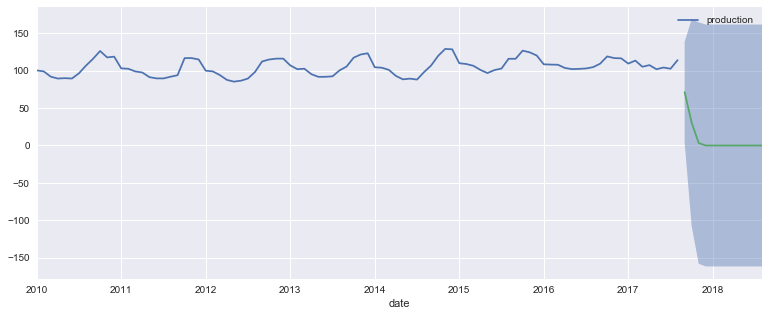

In [161]:
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()
# La predicción es bastante mala

# El modelo ARMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

ARMA(1, 1): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + m<sub>1</sub>.&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

ARMA(p, q): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + a<sub>p</sub>.R<sub>t-p</sub> + R<sub>t</sub> + m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&epsilon;<sub>t-2</sub> + ... + m<sub>q</sub>.&epsilon;<sub>t-q</sub> + &epsilon;<sub>t</sub>

Candy - ARMA(2, 3):

In [167]:
# Es la combinación de AR y MA
model = SARIMAX(candy, order= (2, 0, 3)). fit()

In [168]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  548
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -1915.281
Date:                Fri, 13 Mar 2020   AIC                           3842.562
Time:                        20:20:11   BIC                           3868.400
Sample:                    01-31-1972   HQIC                          3852.661
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0008      0.001      0.542      0.588      -0.002       0.004
ar.L2          0.9992      0.001    680.358      0.000       0.996       1.002
ma.L1          1.3980      0.047     30.047      0.000       1.307       1.489
ma.L2          0.5850      0.070      8.300      0.000       0.447       0.723
ma.L3          0.1775      0.045      3.928      0.000       0.089       0.266
sigma2        61.8791      3.455     17.909      0.000      55.107      68.651
===================================================================================
Ljung-Box (Q):                     1193.36   Jarque-Bera (JB):                56.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [169]:
prediction = model.get_forecast(steps = 12)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

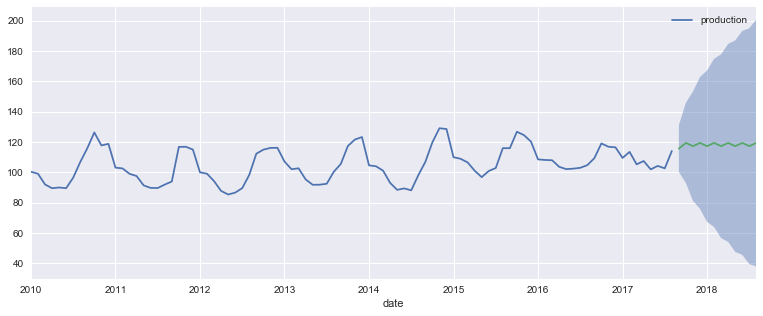

In [170]:
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()
# Sigue sin ser demasiado bueno...

# Series estacionarias (stationary series)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

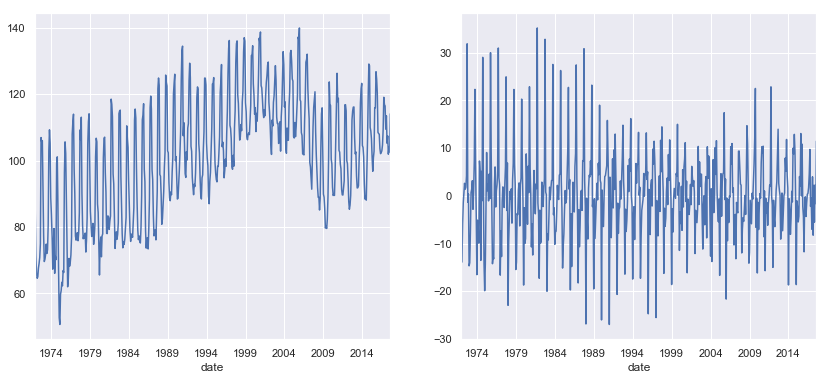

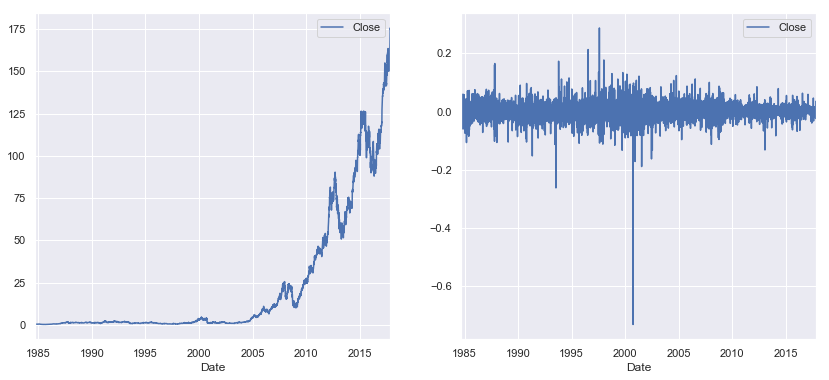

In [ ]:
#Primera grafica: No tiene media constante, es periódica, tampoco la varianza 
#Segunda gráfica: La media es constante, la varianza no.
#Tercera gráfico: Nada constante
#Cuarta gráfica: si parece que tenga media y varianza constante

In [ ]:
# importante, siempre hay que hacer un análisis visual para ver si la serie es estacionaria, pero para hacerlo fácil,
# se hace el modelo de Dicky

## El test de Dicky-Fuller Aumentado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [171]:
from statsmodels.tsa.stattools import adfuller

In [172]:
# El test parte de la hipótesis nula de que la serie no es estacionaria, por lo que quremos descartar esa 
# hipótesis nula
adfuller(candy.production)
# El test nos dice que el resultado es -1.88, y abajo sale el p-value, probabilidad que dando por sentada que la HO
# es correcta(es decir no es estacionaria), p-value= 0,3381 que significa que es
# demasiado probable, no podemos descartar la HO, si fuera 0.0XX si podríamos descartarla
# es decir, decir que confirmar que sí es estacionaria(p-value inferior a 0.05 descartamos la hipótesis nula)
# Resumen: es posible que candy no sea estacionaria.

(-1.8870498112252763,
 0.3381775973004313,
 14,
 533,
 {'1%': -3.442678467240966,
  '5%': -2.8669778698997543,
  '10%': -2.5696661916864083},
 3012.789090974259)

## Transformaciones
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [ ]:
# Ojo hay muy pocos datasets estacionarios, por lo que no se puede aplciar ARIMA directamente, pero
# podemos transformar los datos para poder aplicar correctamente ARIMA

###### Diferencia

In [174]:
# Es una de las transformaciones más comunes
candy.head()

,production
date,
1972-01,85.6945
1972-02,71.8200
1972-03,66.0229
1972-04,64.5645
1972-05,65.0100


In [177]:
candy.shift(1).head()

,production
date,
1972-01,NaN
1972-02,85.6945
1972-03,71.8200
1972-04,66.0229
1972-05,64.5645


In [179]:
candy_diff = candy - candy.shift(1)
candy_diff.head()

,production
date,
1972-01,NaN
1972-02,-13.8745
1972-03,-5.7971
1972-04,-1.4584
1972-05,0.4455


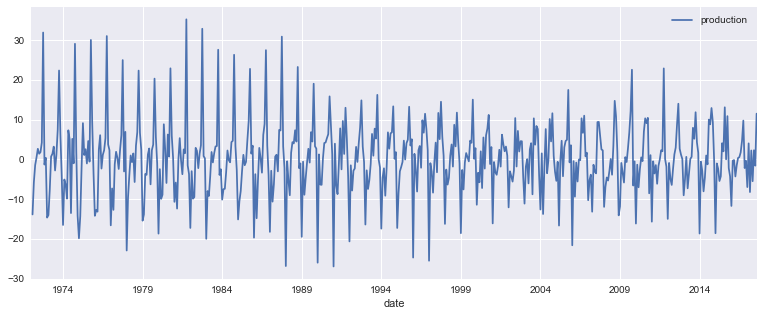

In [180]:
candy_diff = candy.diff(1)
candy_diff.head()
candy_diff.plot()

In [201]:
#Le quitamos los NaN para que no salga error
candy_diff= candy_diff.dropna()

In [202]:
# Le pasamos el test anterior
adfuller(candy_diff)
# El valor es casi cero de p-value (XXXXX-08), nos permite rechazar la HO de que la serie no sea estacionaria
# Ahora podemsos decir que pasa el test, es decir, que puede ser estacionaria

(-6.119511504715748,
 8.92558420357052e-08,
 13,
 533,
 {'1%': -3.442678467240966,
  '5%': -2.8669778698997543,
  '10%': -2.5696661916864083},
 3009.6697664167204)

###### Porcentaje de cambio

Apliquémoslo al dataset AirPassengers.csv.

In [189]:
air_passengers = pd.read_csv('datasets/AirPassengers.csv', parse_dates = ['Month'])
air_passengers.rename({'Month': "date", '#Passengers': 'passengers'}, axis = 1, inplace = True)
air_passengers.set_index('date', inplace = True)
air_passengers.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


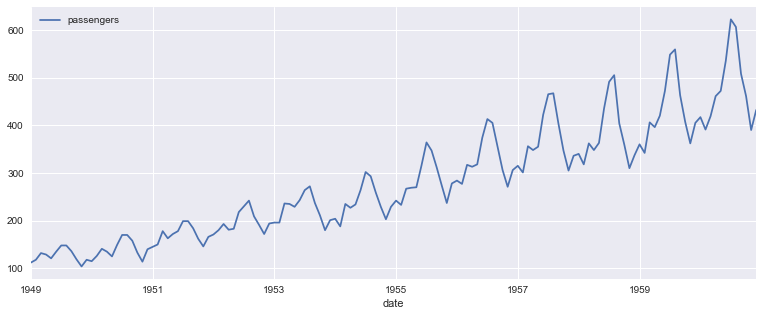

In [192]:
air_passengers.plot()
# No parece muy estacionaria

In [191]:
adfuller(air_passengers)
# Nos da un resultado muy muy malo, es un 99% de p-value

(0.8153688792060512,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [196]:
# Aplicamos trasnformación
air_passengers_pct = air_passengers.pct_change().dropna()
air_passengers_pct.head()

,passengers
date,
1949-02-01,0.053571
1949-03-01,0.118644
1949-04-01,-0.022727
1949-05-01,-0.062016
1949-06-01,0.115702


In [197]:
adfuller(air_passengers_pct)
# Podemso descartar que no es estacionaria, pero muy justo.

(-2.926108907545383,
 0.042395039725239676,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -425.9255544019345)

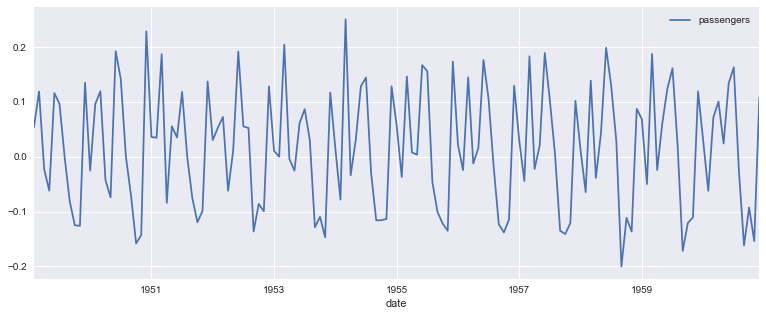

In [198]:
air_passengers_pct.plot();
# Si lo vemso en grafico, se ve que no está mal, varianza medianamente constante, media constante,
# peeero hay periodicidad, aunque en general hemos mejorado.

#Conclusión: Si tenemos datos con tendencias, aplicar transformación de diferencia porque funciona (nos cargamos la tendencia)
# Esta transformación de diferencia se utiliza MUCHO, y es tan frecuente que el modelo ARIMA ya lo incluye

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Pasa a esta serie el test de Dicky-Fuller aumentado ¿es estacionaria?</div>
</div>

###### Logaritmo

In [ ]:
# Una transformación de logaritmo, esto lo hemos visto por encima

###### Otras funciones

###### Funciones combinadas

air_passengers + log + diff

In [ ]:
# si las combinamos siempre hacer primero el log

## Integración
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# El modelo ARIMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Candy - ARIMA(3, 1, 2)

In [203]:
model = SARIMAX(candy, order = (3,1,2)).fit()

In [204]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  548
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -1814.306
Date:                Fri, 13 Mar 2020   AIC                           3640.611
Time:                        21:05:01   BIC                           3666.438
Sample:                    01-31-1972   HQIC                          3650.706
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5387      0.051     30.199      0.000       1.439       1.639
ar.L2         -0.6909      0.085     -8.100      0.000      -0.858      -0.524
ar.L3         -0.1519      0.050     -3.042      0.002      -0.250      -0.054
ma.L1         -1.7722      0.023    -75.647      0.000      -1.818      -1.726
ma.L2          0.8863      0.022     39.871      0.000       0.843       0.930
sigma2        44.1715      2.283     19.347      0.000      39.697      48.646
===================================================================================
Ljung-Box (Q):                     1492.38   Jarque-Bera (JB):               117.20
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [206]:
# Hacemos la predicción
prediction = model.get_forecast(steps = 24)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

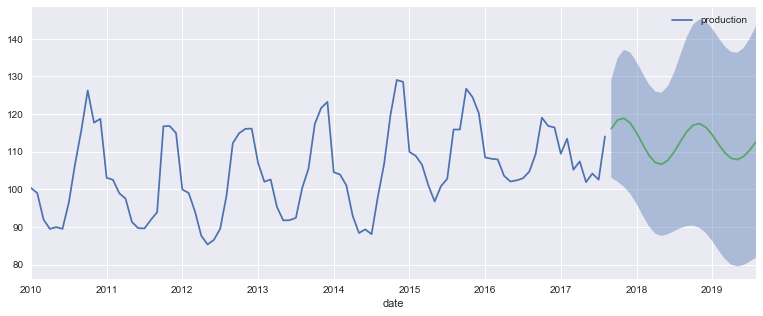

In [207]:
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()
# Una predicción mucho mejor, aplicando antes la diferencia con el ARIMA.
# El AIC y BIC es menor también se ve (ambos parámetros solo nos sirven para comparar entre modelos)

# Búsqueda en bucle del mejor modelo
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [208]:
best_aic = 999999
for p in range(4):
    for q in range(4):
        for d in range(2):
            try:
                model = SARIMAX(candy, order = (p, d, q)).fit()
                if model.aic < best_aic:
                    best_aic = model.aic
                    print(p, d, q, model.aic, model.bic)
            except:
                pass

# Aquí hacemos una búsqueda en bucle comparando modelos a través del AIC y BIC para encontrar el mejor modelo
# Vemos que el mejor modelo que es el último: 3 1 3 (podemos aumentar los valores)

0 0 0 6628.977256015899 6633.283531302847
0 1 0 3960.6789418402914 3964.9833906427134
0 1 1 3934.649407427262 3943.258305032106


/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 1 2 3887.9414434005257 3900.854789807792
0 1 3 3856.076777432049 3873.294572641737


/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1 1 3 3785.123649812007 3806.6458938241167


/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 3 3638.4627899385214 3664.289482753053


/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 1 3 3557.9603325632343 3588.091474180188


/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Descomposición de una serie estacional
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

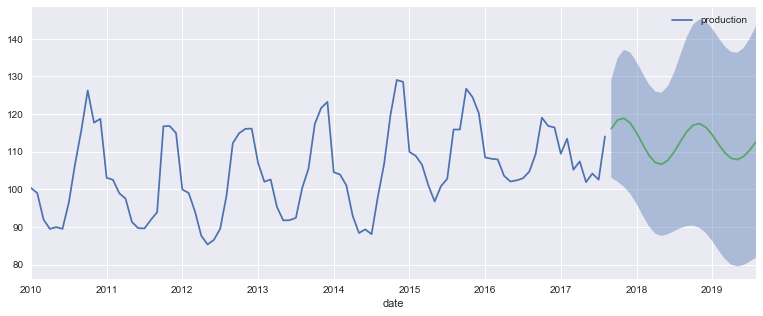

In [213]:
# Este es un resumen del último modelo
model = SARIMAX(candy, order = (3, 1, 2)).fit()
prediction = model.get_forecast(steps = 24)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

In [216]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [217]:
decomposition = seasonal_decompose(candy)
#Da error porque no sabe lo que es el periodo.

TypeError: PeriodIndex given. Check the `freq` attribute instead of using infer_freq.

In [218]:
decomposition = seasonal_decompose(candy.to_timestamp())

In [220]:
decomposition.trend

date
1972-01-01   NaN
1972-02-01   NaN
1972-03-01   NaN
1972-04-01   NaN
1972-05-01   NaN
              ..
2017-04-01   NaN
2017-05-01   NaN
2017-06-01   NaN
2017-07-01   NaN
2017-08-01   NaN
Freq: MS, Name: trend, Length: 548, dtype: float64

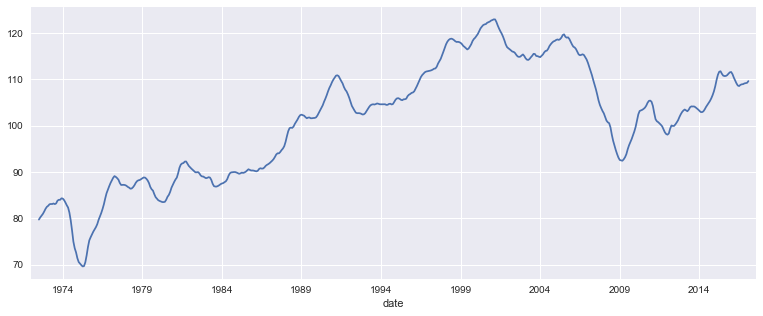

In [221]:
decomposition.trend.plot();

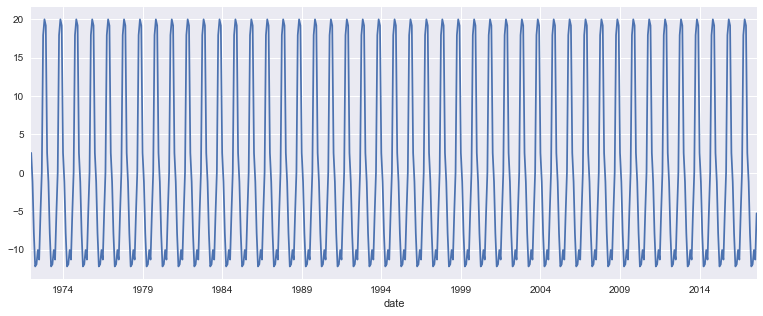

In [222]:
decomposition.seasonal.plot();

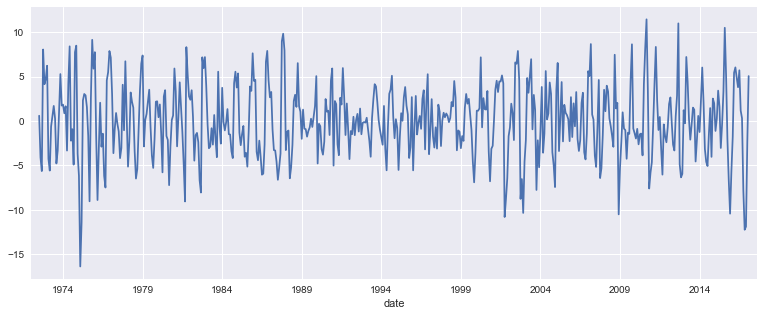

In [223]:
decomposition.resid.plot();

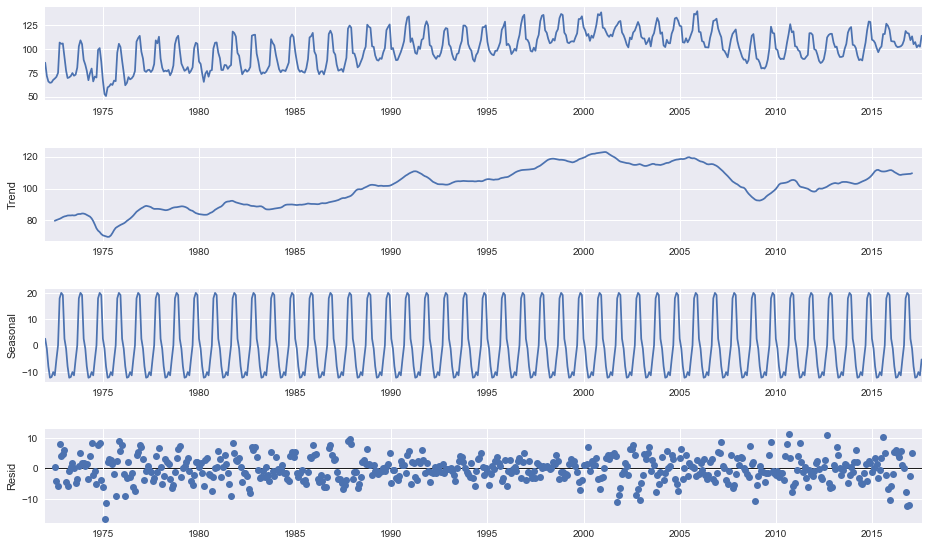

In [226]:
fig = decomposition.plot()
fig.set_size_inches(13,8)
plt.show()

# El modelo SARIMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [ ]:
# El modelo SARIMA, es el modelo ARMA pero que mire también valores más alejados: Seasonal ARIMA

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ARIMA(2, 0, 1):&nbsp;&nbsp;&nbsp;y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + a<sub>2</sub>y<sub>t-2</sub> + m<sub>1</sub>&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

SARIMA(0, 0, 0)(2, 0, 1)<sub>7</sub>:&nbsp;&nbsp;&nbsp;y<sub>t</sub> = a<sub>7</sub>y<sub>t-7</sub> + a<sub>14</sub>y<sub>t-14</sub> + m<sub>7</sub>&epsilon;<sub>t-7</sub> + &epsilon;<sub>t</sub>


model = SARIMAX(dataframe, order = (p, i, q), seasonal_order = (P, I, Q, S), trend = "c")

Convendrá convertir el índice del dataframe a timestamp para evitar problemas con la función plot_diagnostics...

Candy - SARIMA(3,1,2)(1, 1, 2, 12):

In [250]:
model = SARIMAX(candy.to_timestamp(), order = (3,1,2), seasonal_order= (1,1,2,12)).fit() #Perioricidad 12
model.summary()

/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         production   No. Observations:                  548
Model:             SARIMAX(3, 1, 2)x(1, 1, 2, 12)   Log Likelihood               -1466.780
Date:                            Fri, 13 Mar 2020   AIC                           2951.561
Time:                                    21:44:35   BIC                           2990.101
Sample:                                01-01-1972   HQIC                          2966.640
                                     - 08-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2116      0.281      0.753      0.451      -0.339       0.762
ar.L2          0.3558      0.197      1.809      0.070      -0.030       0.741
ar.L3          0.1679      0.049      3.460      0.001       0.073       0.263
ma.L1         -0.5108      0.284     -1.801      0.072      -1.067       0.045
ma.L2         -0.4388      0.265     -1.653      0.098      -0.959       0.081
ar.S.L12      -0.0013      0.425     -0.003      0.998      -0.834       0.831
ma.S.L12      -0.6382      0.421     -1.516      0.130      -1.464       0.187
ma.S.L24      -0.1082      0.302     -0.359      0.720      -0.700       0.483
sigma2        13.8133      0.710     19.467      0.000      12.423      15.204
===================================================================================
Ljung-Box (Q):                       80.35   Jarque-Bera (JB):                26.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                            -0.25
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [251]:
prediction = model.get_forecast(steps = 24) #Predicción para dos años vista

In [252]:
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

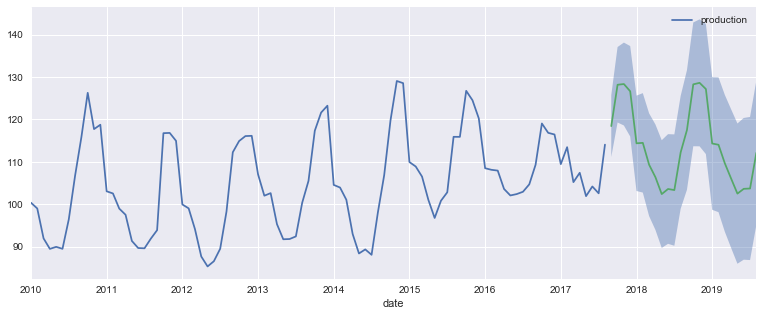

In [253]:
candy.truncate(before = "2010").plot()
prediction.predicted_mean.plot()
plt.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()
# Vemos que es un modelo muchísimo mejor

# Diagnóstico del modelo
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [254]:
model.resid.head()

date
1972-01-01    85.694500
1972-02-01   -13.874292
1972-03-01    -5.797061
1972-04-01    -1.458528
1972-05-01     0.445557
Freq: MS, dtype: float64

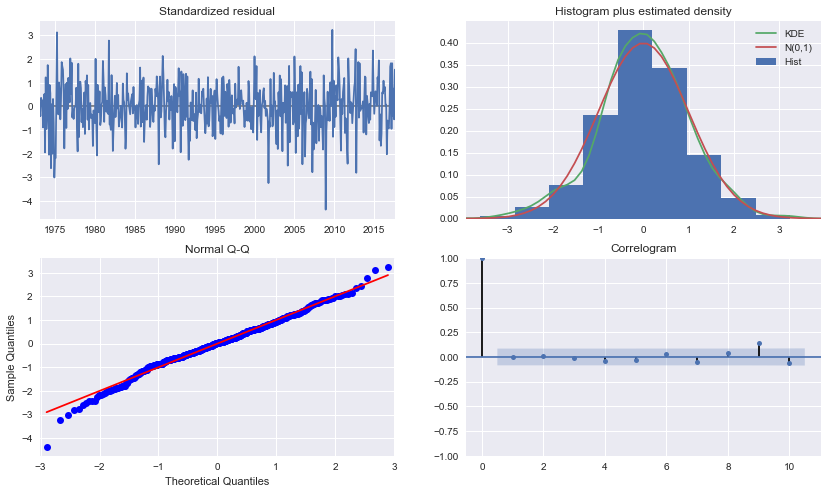

In [255]:
model.plot_diagnostics(figsize = (14, 8))
plt.show()
#Estas tres gráficas nos permiten evaluar todo
# Gráfico 1: 
# Gráfico 2: Tendría que ser una distribucióin gaussiana
# Gráfica 3: Si nuestos datos fueran gaussianos, estarían los puntos en la recta roja en la parte central, aunque en este caso hay mucha diferencia en los finales
# GRáfica 4: La autocorrelación es casi nula
# En general: gráficos no estñan nmal pero el Q-Q y el estandar no es del todo bueno.

In [257]:
model.summary()

# Hay dos test de hipótesis más:
# Ljung: Prob(Q) es 0, la hipotesis nula es verdadera
# Jarque: Prob(JB) es 0, la hipotesis nula es verdadera
# Esto descarta nuestras hipotesis anteriores

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         production   No. Observations:                  548
Model:             SARIMAX(3, 1, 2)x(1, 1, 2, 12)   Log Likelihood               -1466.780
Date:                            Fri, 13 Mar 2020   AIC                           2951.561
Time:                                    21:48:10   BIC                           2990.101
Sample:                                01-01-1972   HQIC                          2966.640
                                     - 08-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2116      0.281      0.753      0.451      -0.339       0.762
ar.L2          0.3558      0.197      1.809      0.070      -0.030       0.741
ar.L3          0.1679      0.049      3.460      0.001       0.073       0.263
ma.L1         -0.5108      0.284     -1.801      0.072      -1.067       0.045
ma.L2         -0.4388      0.265     -1.653      0.098      -0.959       0.081
ar.S.L12      -0.0013      0.425     -0.003      0.998      -0.834       0.831
ma.S.L12      -0.6382      0.421     -1.516      0.130      -1.464       0.187
ma.S.L24      -0.1082      0.302     -0.359      0.720      -0.700       0.483
sigma2        13.8133      0.710     19.467      0.000      12.423      15.204
===================================================================================
Ljung-Box (Q):                       80.35   Jarque-Bera (JB):                26.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                            -0.25
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Automatización del cálculo de los órdenes óptimos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [258]:
import pmdarima as pm

/Users/victormac/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/victormac/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


http://alkaline-ml.com/pmdarima/1.0.0/modules/generated/pmdarima.arima.auto_arima.html

In [259]:
# Con esta libreria podemos hacer este cálculo de forma automatizada, la m es la perioricidad
# Elige el mejor modelo y lo entrena
model = pm.auto_arima(
    candy,
    m = 12,
    suppress_warnings=True
)

/Users/victormac/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 4) seasonal_order=(1, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


In [260]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  548
Model:             SARIMAX(3, 1, 3)x(1, 0, [1, 2], 12)   Log Likelihood               -1497.375
Date:                                 Fri, 13 Mar 2020   AIC                           3016.751
Time:                                         21:57:47   BIC                           3064.100
Sample:                                              0   HQIC                          3035.258
                                                 - 548                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.000      0.997      0.319      -0.000       0.001
ar.L1         -0.2618      0.026    -10.074      0.000      -0.313      -0.211
ar.L2          0.0204      0.030      0.683      0.495      -0.038       0.079
ar.L3          0.8632      0.024     35.597      0.000       0.816       0.911
ma.L1          0.0996      0.028      3.522      0.000       0.044       0.155
ma.L2         -0.1751      0.030     -5.806      0.000      -0.234      -0.116
ma.L3         -0.9191      0.032    -28.974      0.000      -0.981      -0.857
ar.S.L12       0.9856      0.004    237.144      0.000       0.977       0.994
ma.S.L12      -0.6804      0.050    -13.504      0.000      -0.779      -0.582
ma.S.L24       0.0028      0.048      0.058      0.954      -0.092       0.098
sigma2        14.1542      0.802     17.642      0.000      12.582      15.727
===================================================================================
Ljung-Box (Q):                       47.81   Jarque-Bera (JB):                76.90
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                            -0.29
Prob(H) (two-sided):                  0.19   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

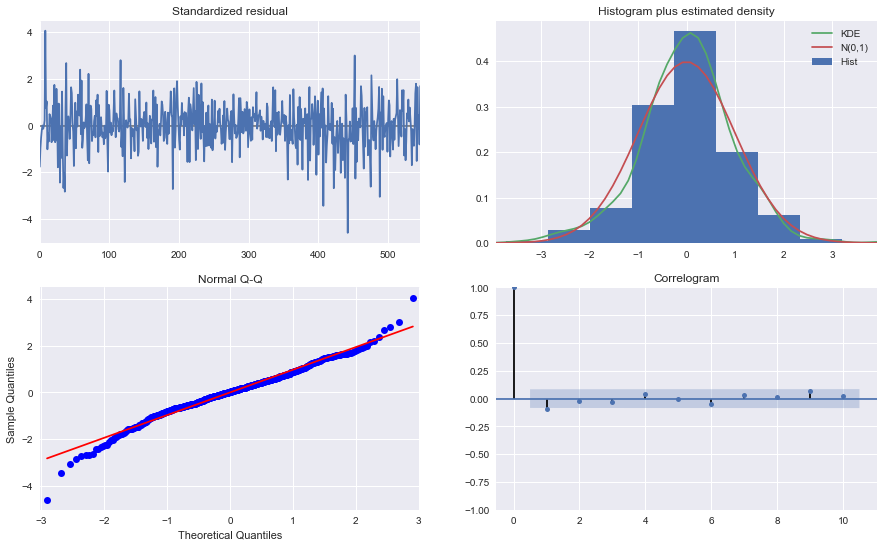

In [261]:
fig = model.plot_diagnostics()
fig.set_size_inches(15, 9)
plt.show()

In [267]:
#Aquí hacemos la predicción:
forecast_mean, conf_int = model.predict(24, return_conf_int = True)

In [268]:
forecast_lower = conf_int[:, 0]
forecast_upper = conf_int[:, 1]

In [269]:
dates = pd.period_range(start = candy.index[-1], periods = 25, freq = "M")[1:]
dates

PeriodIndex(['2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02',
             '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08'],
            dtype='period[M]', freq='M')

In [270]:
forecast = pd.Series(forecast_mean, index = dates)

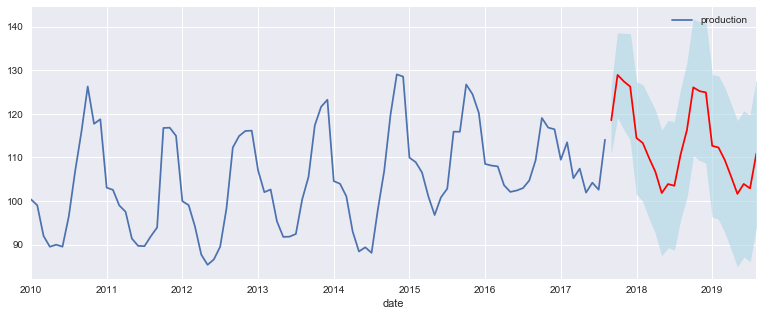

In [271]:
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
forecast.plot(ax = ax, color = "red")
plt.fill_between(dates, forecast_lower, forecast_upper, color = "lightblue", alpha = 0.6)
plt.show()
# El resultado es muy parecido al anterior

# El modelo ARIMAX
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

ARMA(1,1): y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + m<sub>1</sub>&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

ARMAX(1,1): y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + m<sub>1</sub>&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub> + x<sub>1</sub>z<sub>t</sub>

In [272]:
# Esto es para implicar más datos en el análisis
ventas = pd.Series([10, 22, 15, 10, 25, 30, 18, 12, 21, 18, 11, 24, 28, 24])

In [273]:
festivos = pd.Series([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [278]:
model = SARIMAX(ventas, order = (2,0,1), seasonal_order = (1,0,1,7), exog = festivos).fit()

/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [283]:
prediction = model.get_forecast(steps= 2, exog = pd.Series([0,1]))
# Importante que coincidas datos exog estos con los que le has dado para entrenar

In [288]:
prediction.predicted_mean # Predicción para día festivo y no, se ve e la gráfico.

14    14.251559
15    19.280336
dtype: float64

In [284]:
lower = prediction.conf_int()["lower y"]
upper = prediction.conf_int()["upper y"]

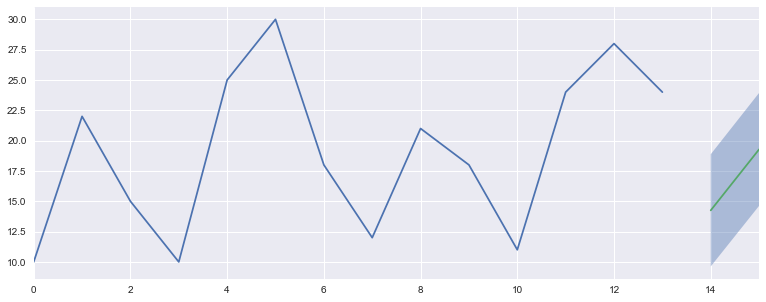

In [286]:
fig, ax = plt.subplots()
ventas.plot(ax = ax)
prediction.predicted_mean.plot(ax = ax, label = "Forecast")
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()
# Hace una predicción teniendo en cuenta si es día festivo o no.

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Repite el ejercicio suponiendo que ambos días van a ser festivos</div>
</div>

# Miscelánea
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

## Perfiles de los datos AR y MA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [ ]:
from statsmodels.tsa.arima_process import arma_generate_sample

### Datos AR
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra la funciones de autocorrelación y de autocorrelación parcial para datos de un modelo AR(2)</div>
</div>

### Datos MA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra la funciones de autocorrelación y de autocorrelación parcial para datos de un modelo MA(2)</div>
</div>

## Tipos de datos temporales en pandas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

#### La clase Timestamp

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

In [ ]:
pd.Timestamp("1/2/2019")

In [ ]:
pd.Timestamp(2019, 2, 1)

In [ ]:
pd.Timestamp(2019, 2, 1, 16, 17, 22)

In [ ]:
pd.Timestamp(year = 2019, month = 10, day = 28, hour = 16, minute = 56, second = 12,
                 microsecond = 13, nanosecond = 16)

In [ ]:
from datetime import date

In [ ]:
pd.Timestamp(date(2019, 8, 26))

In [ ]:
d = pd.Timestamp(year = 2019, month = 10, day = 28, hour = 16, minute = 56, second = 12,
                 microsecond = 13, nanosecond = 16)
d

In [ ]:
print(d.year)
print(d.month)
print(d.day)
print(d.hour)
print(d.minute)
print(d.second)
print(d.microsecond)
print(d.nanosecond)

In [ ]:
print(d.quarter)
print(d.week)
print(d.dayofweek)
print(d.dayofyear)
print(d.day_name())
print(d.month_name())

#### La clase Period

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Period.html

In [ ]:
p = pd.Period("2017-01")
p

In [ ]:
p.start_time

In [ ]:
p.end_time

In [ ]:
p.asfreq("D")

In [ ]:
p = pd.Period("2017-05-23")
p

In [ ]:
q = p.asfreq("M")
q

In [ ]:
q.asfreq("D")

In [ ]:
pd.Period("2018-05").to_timestamp()

In [ ]:
p = pd.Period("2017-05-23")
p + 2

In [ ]:
p = pd.Period("2017-05-23")
q = pd.Period("2017-05-28")
q - p

#### La clase Timedelta

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.html

In [ ]:
d = pd.Timedelta(weeks = 1, days = 2, hours = 3, minutes = 4, seconds = 5, milliseconds = 6,
                 microseconds = 7, nanoseconds = 8)
d

In [ ]:
print(d.days)
print(d.seconds)
print(d.microseconds)
print(d.nanoseconds)

In [ ]:
pd.Timedelta("1 day 1 second")

In [ ]:
pd.Timedelta("1 day 1 millisecond")

In [ ]:
pd.Timedelta("1 hour")

In [ ]:
pd.Timedelta("2 hour")

In [ ]:
pd.Timedelta("2 hours")

In [ ]:
pd.Timedelta("2.3 hours")

In [ ]:
pd.Timestamp(2019, 8, 25, 18, 49) + pd.Timedelta("3 hours")

#### La clase date_range

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html

In [ ]:
pd.date_range("August, 28 2018", periods = 5, freq = "M")

In [ ]:
pd.date_range("August, 28 2018", periods = 5, freq = "D")

In [ ]:
pd.date_range(start = date(2019, 8, 13), end = date(2019, 9, 21), freq = "W")

In [ ]:
pd.date_range(start = "2018-01-1", end = "2019-12-31", freq = "MS")

In [ ]:
from datetime import datetime

In [ ]:
pd.date_range(start = datetime.today(), periods = 5, freq = "H")

In [ ]:
pd.date_range(start = "2019-1-1", end = "2019-3-1", periods = 4)

In [ ]:
pd.date_range(start = "2019-8-1", end = "2019-8-31", freq = "B")

In [ ]:
pd.date_range(start = "2019-8-1", end = "2019-8-31", freq = "B") + pd.Timedelta("3 hours")

<div style="background:#0099cc;padding:20px;color:#ffffff">
    <strong>EJERCICIO</strong>
Crea un dataframe df con 12 fechas consecutivas (interpretadas como puntos en el tiempo) a partir del 1 de enero de 2019 en el índice y una columna "Value" con valores aleatorios:
</div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
Crea un dataframe df con 6 horas consecutivas (interpretadas como períodos) a partir de las 6 de la tarde del 11 de marzo de 2019 en el índice y una columna "Value" con valores aleatorios:
</div>

#### La clase period_range

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.period_range.html

In [ ]:
p = pd.period_range(start = "2019-1-1T15:0:0", periods = 12, freq = "H")
p

## Herramientas de pandas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

### Remuestreado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

Leamos el dataset *global_temperature_monthly.csv*. ¿Las muestras están distribuidas tal y como necesitamos?

Esto es especialmente útil si las fechas no son periódicas:

In [ ]:
data = pd.read_csv("months.csv", parse_dates = ["date"], index_col = "date")
data

### Interpolado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

Una herramienta muy útil es la que nos permite sustituir valores nulos por el resultado de interpolar los valores existentes, lo que puede ocurrir si aplicamos a un dataframe una frecuencia: df = df.asfreq("D"). Veámoslo en el dataset de days.csv

### Truncado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.truncate.html

Otro útil método es .truncate(), que nos permite eliminar los índices anteriores y/o posteriores a uno dado.

**IMPORTANTE**: El índice deberá estar ordenado.

Podemos aplicarlo a candy... tanto con períodos mensuales como anuales.

### Desplazamientos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El método .shift() aplicado a una serie o a un dataframe nos permite desplazarlo en una dirección (por defecto hacia abajo):

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [ ]:
data = pd.DataFrame(np.random.randint(0, 10, 20).reshape(4, -1), columns = list("ABCDE"))
data

### Diferencias
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html

El método .diff() permite calcular la diferencia de las columnas o filas de un dataframe:

In [ ]:
data

In [ ]:
s = pd.Series([2, 5, 4, 7, 6, 1, 5, 3])
s

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>